<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/gilbut_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load data

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


train data

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

test data

In [ ]:
test_images.dtype

dtype('uint8')

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Building neural networks

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()

In [ ]:
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))                                 # sum = 0

Compile

In [ ]:
network.compile(optimizer = 'rmsprop', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((60000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# from keras.utils import to_categorical
from keras import utils
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ImportError: ignored

fit and test

In [ ]:
network.fit(train_images, train_labels,
            epochs = 5,
            batch_size = 128)

Epoch 1/5


ValueError: ignored

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

ValueError: ignored

In [ ]:
print('test_acc : ', test_acc)

---------------------------------------------


## What is tensor?

scalar (0D tensor)

In [ ]:
import numpy as np

x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

vector (1D tensor)

In [ ]:
x = np.array([12, 3, 6, 14, 7])                                                   # 5개의 원소 = 5차원 벡터 (하나의 축을 따라 5개의 차원을 가진 것)
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

matrix (2D tensor)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
x.ndim

2

3D tensor

In [ ]:
x = np.array([[[5, 78,  2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

example using mnist data

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.ndim

3

In [ ]:
train_images.dtype

dtype('uint8')

- 8비트 정수형 3D 텐서
- 28 * 28 크기의 정수 행렬 60000개
- 각 행렬은 하나의 흑백이미지, 행렬의 각 원소는 0 ~ 255 사이의 값을 가짐.

In [ ]:
digit = train_images[4]

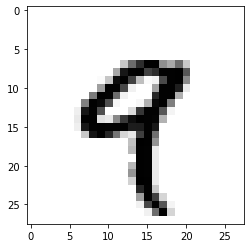

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

Managing tensor with numpy (slicing)

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

Batch

In [ ]:
batch1 = train_images[:128]
batch2 = train_images[128:256]

batchn = train_images[128 * n :128 * (n + 1)]

## Tensor Operation

In [ ]:
from keras import models
from keras import layers

In [ ]:
# keras.layers.Dense(512, activation = 'relu')
# output = relu(dot(W, input) + b)

element-wise operation

Naive relu

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2                                                        # x is 2D numpy array

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x

Naive add

In [ ]:
def naive_add(x,y):
  assert len(x.shape) == 2                                                        # x and y are 2D numpy array
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [ ]:
import numpy as np

z = x + y
z = np.maximum(z,0.)

numpy calculates relu function faster than defining naive relu function.

## Broadcasting

- what happens if we add two tensors with different size?
- smaller tensor is **broadcasted** to bigger tensor.

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2                                                        # x is 2D numpy array
  assert len(y.shape) == 1                                                        # y is numpy vector
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i]
  return x

In [ ]:
import numpy as np

x = np.random.random((64, 3, 32, 10))                                             # x is random tensor with size of (64, 3, 32, 10)
y = np.random.random((32, 10))                                                    # y is random tensor with size of (32, 10)

z = np.maximum(x,y)
z

Dot Operation

- dot in numpy, keras
- tf.matmul() in tensorflow

In [ ]:
import numpy as np

z = np.dot(x,y)

In [ ]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [ ]:
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])                                                        # zero vector with same column size of x
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j] * y[i]
  return x

Tensor Reshaping

In [ ]:
import numpy as np

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

x.shape

(3, 2)

In [ ]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

Transpose

In [ ]:
x = np.zeros((300,20))                                                            # zero vector with shape of (300,20)
x = np.transpose(x)
x.shape

(20, 300)

## Gradient Optimization